In [76]:
#Importing Libraries
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt


In [77]:
count = 0 
dirs = os.listdir('data/')
for dir in dirs:
    files = list(os.listdir('data/'+dir))
    print( dir +' Folder has '+ str(len(files)) + ' Images')
    count = count + len(files)
print( 'Images Folder has '+ str(count) + ' Images')

Acorales Folder has 75 Images
Alismatales Folder has 76 Images
Apiales Folder has 228 Images
Arecales Folder has 144 Images
Asparagales Folder has 111 Images
Asterales Folder has 95 Images
Boraginales Folder has 78 Images
Brassicales Folder has 72 Images
Caryophyllales Folder has 69 Images
Commelinales Folder has 70 Images
Cucurbitales Folder has 93 Images
Ericales Folder has 80 Images
Fabales Folder has 58 Images
Gentianales Folder has 106 Images
Lamiales Folder has 44 Images
Laurales Folder has 82 Images
Magnoliales Folder has 83 Images
Malpighiales Folder has 70 Images
Malvales Folder has 58 Images
Myrtales Folder has 90 Images
Oxalidales Folder has 79 Images
Piperales Folder has 92 Images
Poales Folder has 77 Images
Ranunculales Folder has 82 Images
Rosales Folder has 83 Images
Salviniales Folder has 86 Images
Sapindales Folder has 85 Images
Saxifragales Folder has 74 Images
Solanales Folder has 72 Images
Zingiberales Folder has 147 Images
Zygophyllales Folder has 89 Images
Images 

In [78]:
# import os
# import cv2
# import imghdr
# import numpy as np

# data_dir = 'data'
# image_exts = ['jpeg', 'jpg', 'png']

# def has_alpha_channel(image_path):
#     img = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
#     if img is None:
#         return False
#     # Check if the image has an alpha channel
#     return img.shape[2] == 4 if len(img.shape) == 3 else False

# for image_class in os.listdir(data_dir): 
#     for image in os.listdir(os.path.join(data_dir, image_class)):
#         image_path = os.path.join(data_dir, image_class, image)
#         try: 
#             img = cv2.imread(image_path)
#             tip = imghdr.what(image_path)
#             if tip not in image_exts: 
#                 print('Image not in ext list {}'.format(image_path))
#                 os.remove(image_path)
#             elif has_alpha_channel(image_path):
#                 print('Image has transparency {}'.format(image_path))
#                 os.remove(image_path)
#         except Exception as e: 
#             print('Issue with image {}'.format(image_path))
#             print(e)

In [79]:
# import os

# def rename_files_in_directory(base_dir):
#     for root, dirs, files in os.walk(base_dir):
#         count = 1
#         for name in files:
#             file_extension = os.path.splitext(name)[1]  # Get file extension
#             new_name = f"{count}{file_extension}"
#             old_path = os.path.join(root, name)
#             new_path = os.path.join(root, new_name)
            
#             if os.path.exists(new_path):
#                 print(f"Skipped renaming {old_path} as {new_path} already exists")
#                 continue
            
#             # Replace non-UTF-8 characters with '_'
#             new_name = ''.join(x if x.isalnum() or x in ('.', '_') else '_' for x in new_name)
            
#             os.rename(old_path, new_path)
#             print(f"Renamed {old_path} to {new_path}")
#             count += 1

# base_dir = r'data/'
# rename_files_in_directory(base_dir)


In [80]:
base_dir = r'data/'
img_size = 224
batch_size = 32

In [81]:
import tensorflow as tf

def image_dataset_from_directory_utf8(directory, **kwargs):
    return tf.keras.utils.image_dataset_from_directory(directory, **kwargs)

# Usage
base_dir = r'data'  # Assuming this is your base directory
full_dataset = image_dataset_from_directory_utf8(
    base_dir,
    seed=123,
    image_size=(img_size, img_size),
    batch_size=batch_size
)

# Get class names
class_names = full_dataset.class_names

# Calculate the number of batches
num_batches = len(full_dataset)
num_train = int(0.7 * num_batches)
num_val = int(0.1 * num_batches)
num_test = num_batches - num_train - num_val

# Split the dataset into train, validation, and test datasets
train_ds = full_dataset.take(num_train)
temp_ds = full_dataset.skip(num_train)
val_ds = temp_ds.take(num_val)
test_ds = temp_ds.skip(num_val)

# Print the sizes of each dataset
print("Train dataset size:", len(train_ds))
print("Validation dataset size:", len(val_ds))
print("Test dataset size:", len(test_ds))


Found 2748 files belonging to 31 classes.
Train dataset size: 60
Validation dataset size: 8
Test dataset size: 18


In [82]:
order_names = full_dataset.class_names
order_names

['Acorales',
 'Alismatales',
 'Apiales',
 'Arecales',
 'Asparagales',
 'Asterales',
 'Boraginales',
 'Brassicales',
 'Caryophyllales',
 'Commelinales',
 'Cucurbitales',
 'Ericales',
 'Fabales',
 'Gentianales',
 'Lamiales',
 'Laurales',
 'Magnoliales',
 'Malpighiales',
 'Malvales',
 'Myrtales',
 'Oxalidales',
 'Piperales',
 'Poales',
 'Ranunculales',
 'Rosales',
 'Salviniales',
 'Sapindales',
 'Saxifragales',
 'Solanales',
 'Zingiberales',
 'Zygophyllales']

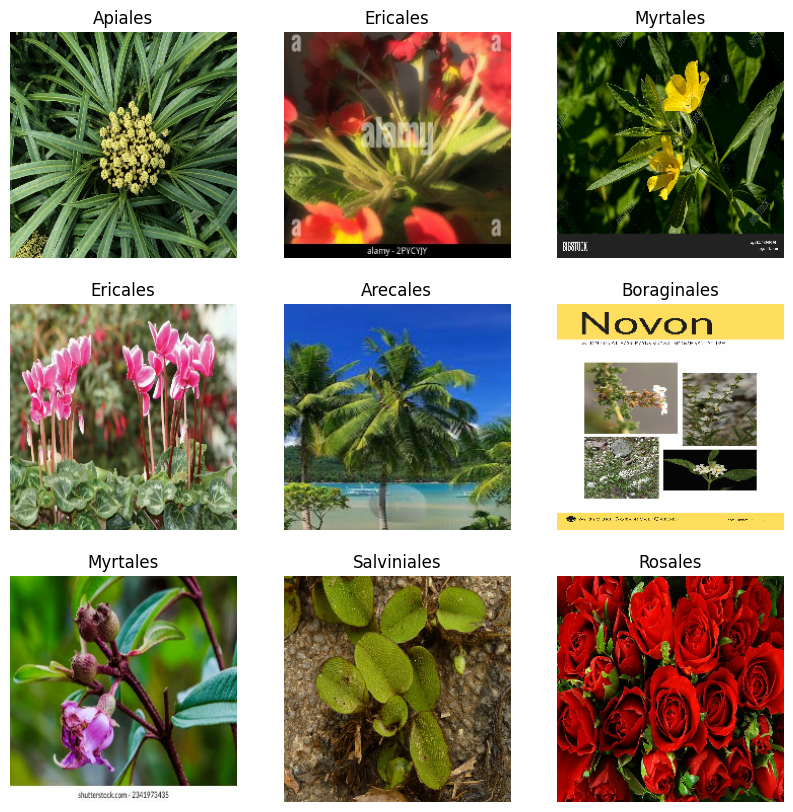

In [83]:
import matplotlib.pyplot as plt

i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(order_names[labels[i]])
        plt.axis('off')

In [84]:
AUTOTUNE = tf.data.AUTOTUNE

In [85]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [86]:
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [87]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape = (224,224,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

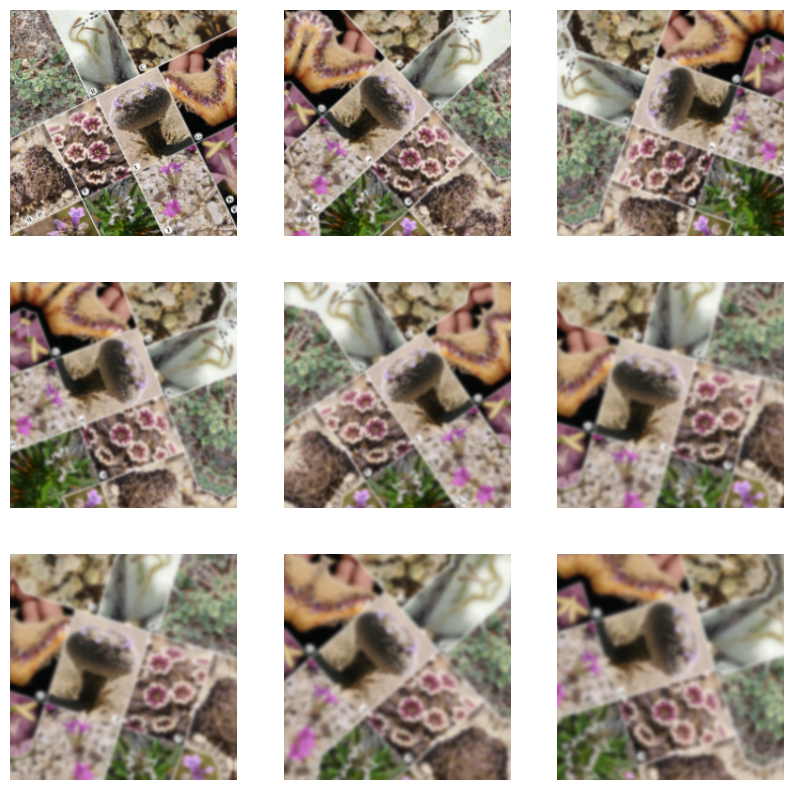

In [88]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

In [89]:
import tensorflow as tf
from tensorflow.keras import layers, Sequential
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam

base_model = ResNet50(input_shape=(224, 224, 3),
                         include_top=False,
                         weights='imagenet')

base_model.trainable = False

model = Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(31)
])

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_1  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_2 (Dense)             (None, 128)               262272    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 31)                3999      
                                                                 
Total params: 23853983 (91.00 MB)
Trainable params: 266271 (1.02 MB)
Non-trainable params: 23587712 (89.98 MB)
_________

In [91]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(factor=0.2, patience=3)

history = model.fit(train_ds,
                    epochs=100,
                    validation_data=val_ds,
                    callbacks=[early_stopping, reduce_lr])

Epoch 1/100


60/60 [==============================] - 163s 3s/step - loss: 3.6055 - accuracy: 0.0589 - val_loss: 3.2015 - val_accuracy: 0.1797 - lr: 1.0000e-04
Epoch 2/100
60/60 [==============================] - 186s 3s/step - loss: 3.1442 - accuracy: 0.1729 - val_loss: 2.9551 - val_accuracy: 0.2578 - lr: 1.0000e-04
Epoch 3/100
60/60 [==============================] - 194s 3s/step - loss: 2.8738 - accuracy: 0.2516 - val_loss: 2.7893 - val_accuracy: 0.3047 - lr: 1.0000e-04
Epoch 4/100
60/60 [==============================] - 195s 3s/step - loss: 2.6972 - accuracy: 0.2995 - val_loss: 2.6387 - val_accuracy: 0.3242 - lr: 1.0000e-04
Epoch 5/100
60/60 [==============================] - 195s 3s/step - loss: 2.5162 - accuracy: 0.3276 - val_loss: 2.5425 - val_accuracy: 0.3398 - lr: 1.0000e-04
Epoch 6/100
60/60 [==============================] - 199s 3s/step - loss: 2.3676 - accuracy: 0.3724 - val_loss: 2.4403 - val_accuracy: 0.3828 - lr: 1.0000e-04
Epoch 7/100
60/60 [==============================] - 203s 

In [92]:
test_pred = model.predict(test_ds)
test_pred = np.argmax(test_pred, axis=1)

test_labels = np.concatenate([y for x, y in test_ds], axis=0)

18/18 [==============================] - 46s 2s/step


In [93]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(test_labels, test_pred)

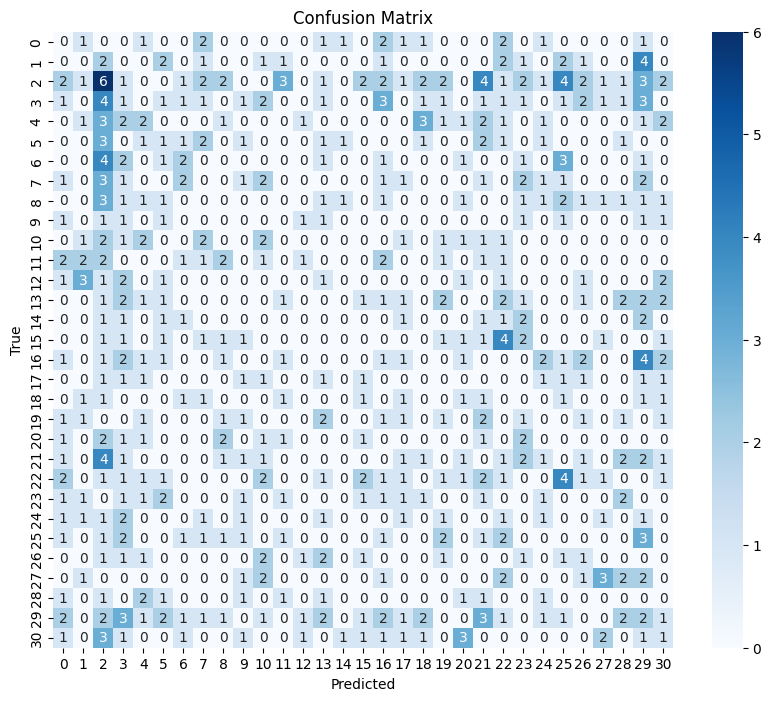

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [95]:
test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

18/18 [==============================] - 42s 2s/step - loss: 2.0373 - accuracy: 0.5175
Test Loss: 2.0373003482818604
Test Accuracy: 0.5174825191497803


In [96]:
y_true = []
y_pred = []

In [97]:
for images, labels in test_ds:
    predictions = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(tf.argmax(predictions, axis=1).numpy())

# Generate classification report
print(classification_report(y_true, y_pred, target_names=class_names))

1/1 [==============================] - 3s 3s/step
                precision    recall  f1-score   support

      Acorales       0.38      0.44      0.41        18
   Alismatales       0.46      0.38      0.41        16
       Apiales       0.63      0.77      0.69        43
      Arecales       0.74      0.74      0.74        34
   Asparagales       0.43      0.43      0.43        23
     Asterales       0.39      0.50      0.44        14
   Boraginales       0.38      0.36      0.37        14
   Brassicales       0.47      0.38      0.42        21
Caryophyllales       0.31      0.24      0.27        17
  Commelinales       0.36      0.62      0.45         8
  Cucurbitales       0.42      0.57      0.48        14
      Ericales       0.50      0.26      0.34        19
       Fabales       0.60      0.20      0.30        15
   Gentianales       0.42      0.35      0.38        23
      Lamiales       0.83      0.38      0.53        13
      Laurales       0.22      0.12      0.16        

In [98]:
model.save('models/plantae_resnet.h5')

c:\Users\Ate Sheesha\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [99]:
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(224, 224))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array, 0)

    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0]).numpy()  # Convert tensor to NumPy array
    
    # Get the top 3 predictions
    top_3_indices = np.argsort(result)[-4:][::-1]
    top_3_scores = result[top_3_indices]
    
    outcome = "Top 3 matches:\n"
    for i in range(3):
        outcome += f"{i+1}. {order_names[top_3_indices[i]]} with a score of {top_3_scores[i] * 100:.2f}%\n"
    
    return outcome

In [100]:
print(classify_images('alismatales.png'))

1/1 [==============================] - 0s 118ms/step
Top 3 matches:
1. Alismatales with a score of 37.72%
2. Acorales with a score of 32.60%
3. Ericales with a score of 6.71%



In [101]:
print(classify_images('commelinales.png'))

1/1 [==============================] - 0s 141ms/step
Top 3 matches:
1. Malpighiales with a score of 53.52%
2. Commelinales with a score of 27.29%
3. Fabales with a score of 3.65%

